In [6]:
# original evaluation
import logging
from lvis import LVIS, LVISResults, LVISEval
import json
# result and val files for 100 randomly sampled images.
RESULT_PATH = "/mnt/data-disk2/xinting/project/maskrcnn/ckp-fewshot-joint_baseline16/Validation/lvis_dt.json"
ANNOTATION_PATH = "/mnt/data-disk2/xinting/project/dataset/LVIS/lvis_subset3/lvis_v0.5_val_top116_ws.json"


ANN_TYPE = 'bbox'

lvis_eval = LVISEval(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE)
lvis_eval.run()
lvis_eval.print_results()

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=all] = 0.246
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=300 catIds=all] = 0.443
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=300 catIds=all] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=     s | maxDets=300 catIds=all] = 0.190
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=     m | maxDets=300 catIds=all] = 0.308
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=     l | maxDets=300 catIds=all] = 0.345
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=  r] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=  c] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=  f] = 0.246
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds= b0] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds= t0] = 0.250
 Average

In [ ]:
def calc_sorted_AP(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH, sorted_id):
    lvis_eval = LVISEvalPerCat(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH)
    lvis_eval.run()
#     lvis_eval.print_results()

    lables_json_file = "/mnt/data-disk2/xinting/project/maskrcnn/labels.json"
    result_AP_json_file = os.path.join(SAVE_PATH, 'lvis_result_percat_mAP.json')

    #show result AP by sorted 

    with open(lables_json_file, 'r') as f:
        lables = json.load(f)
    with open(result_AP_json_file, 'r') as f:
        result_AP = json.load(f)
   
    #num_class = len(sorted_id)
    sorted_cls_AP = []
    valid_cls_id = []
    for cls_i in sorted_id:
        if result_AP[str(cls_i)]!=-1:
            valid_cls_id.extend([cls_i])
            sorted_cls_AP.extend([result_AP[str(cls_i)]])
    return valid_cls_id, sorted_cls_AP

RESULT_PATH = "/mnt/data-disk2/xinting/project/maskrcnn/ckp-fewshot-joint_baseline16/Validation/lvis_dt.json"
ANNOTATION_PATH = "/mnt/data-disk2/xinting/project/dataset/LVIS/lvis_subset3/lvis_v0.5_val_top116.json"
sorted_id_json_file = "/mnt/data-disk2/xinting/project/dataset/LVIS/lvis_subset3/lvis_sorted_id_test.json"
SAVE_PATH = "/mnt/data-disk2/xinting/project/maskrcnn/ckp-fewshot-joint_baseline16/"
ANN_TYPE = 'bbox'
with open(sorted_id_json_file, 'r') as f:
    sorted_id = json.load(f)
    
valid_cls_id1, sorted_cls_AP1 =  calc_sorted_AP(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH, sorted_id)

In [8]:
sorted_cls_AP1[-16:]

[0.20180817071921514,
 0.12804005568638985,
 0.33134534056699533,
 0.21706120229333314,
 0.10382858476807522,
 0.3543905222633691,
 0.2182139197348789,
 0.4715002977049952,
 0.18966069004384964,
 0.18221215338672905,
 0.4665942643342244,
 0.21775399677140478,
 0.2930833500530604,
 0.16201756598077197,
 0.2198089346770032,
 0.24764617935971364]

In [22]:
np.mean(sorted_cls_AP1[-16:])

0.25031032677150056

In [3]:
import logging
from lvis import LVIS, LVISResults, LVISEval, LVISEvalPerCat
import json
import os 
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# lables_json_file = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/labels.json"
# with open(lables_json_file, 'r') as f:
#     lables = json.load(f)
    
def load_sorted_AP(sorted_id_json_file, data_path, top_n):
    result_AP_json_file = os.path.join(data_path, 'lvis_result_percat_mAP.json')

    with open(sorted_id_json_file, 'r') as f:
        sorted_id = json.load(f)
    #show result AP by sorted 

    with open(result_AP_json_file, 'r') as f:
        result_AP = json.load(f)

    sorted_cls_AP = []
    valid_cls_id  = []
    for cls_i in sorted_id[:top_n]:
        if result_AP[str(cls_i)]!=-1:
            valid_cls_id.extend([cls_i])
            sorted_cls_AP.extend([result_AP[str(cls_i)]])
    return sorted_cls_AP

In [3]:
sorted_id_step1 = "/mnt/data-disk2/xinting/project/dataset/LVIS/lvis_subset3/lvis_sorted_id_test.json"
# data_path_finetune_step1_4000 = "/mnt/data-disk2/xinting/project/maskrcnn/ckp-fewshot-joint_baseline16/Validation/28000"
# ap_finetune_step1_4000 = load_sorted_AP(sorted_id_step1, data_path_finetune_step1_4000, 116)


In [4]:
with open(ANNOTATION_PATH, 'r') as f:
    lvis_val_top116 = json.load(f)
with open(sorted_id_step1, 'r') as f:
    sorted_id = json.load(f)

In [7]:
lvis_val_top116.keys()

dict_keys(['info', 'images', 'annotations', 'categories', 'licenses'])

In [8]:
lvis_val_top116_t['categories'][0]

NameError: name 'lvis_val_top116_t' is not defined

In [15]:
sorted_id[-16:]

[852, 30, 980, 89, 625, 853, 301, 4, 1094, 912, 174, 146, 850, 704, 437, 1177]

In [5]:
lvis_val_top116_t = lvis_val_top116.copy()
for i in lvis_val_top116_t['categories']:
    if i['id'] in sorted_id[-16:]:
        i['step_state'] = 't0'
    else:
        i['step_state'] = 'b0'
json.dump(lvis_val_top116_t, open("/mnt/data-disk2/xinting/project/dataset/LVIS/lvis_subset3/lvis_v0.5_val_top116_ws.json", 'w'))

## plot per calss AP

In [1]:
import logging
from lvis import LVIS, LVISResults, LVISEval, LVISEvalPerCat
import json
import os 
import numpy as np


def get_sorted_AP(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH, sorted_id):
    lvis_eval = LVISEvalPerCat(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH)
    lvis_eval.run()
    lvis_eval.print_results()

    lables_json_file = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/labels.json"
    result_AP_json_file = os.path.join(SAVE_PATH, 'lvis_result_percat_mAP.json')

    #show result AP by sorted 

    with open(lables_json_file, 'r') as f:
        lables = json.load(f)
    with open(result_AP_json_file, 'r') as f:
        result_AP = json.load(f)
   
    #num_class = len(sorted_id)
    sorted_cls_AP = []
    valid_cls_id = []
    for cls_i in sorted_id:
        if result_AP[str(cls_i)]!=-1:
            valid_cls_id.extend([cls_i])
            sorted_cls_AP.extend([result_AP[str(cls_i)]])
    return valid_cls_id, sorted_cls_AP

## plot the result for all 108 classes


In [5]:
#result and val files for 108 sampled classes.
RESULT_PATH = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckp-fewshot-joint_baseline/Validation/lvis_dt.json"
ANNOTATION_PATH = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_v0.5_val_top108.json"
SAVE_PATH = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckp-fewshot-joint_baseline/Validation"
sorted_id_json_file = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_sorted_id_test.json"
ANN_TYPE = 'bbox'

with open(sorted_id_json_file, 'r') as f:
    sorted_id = json.load(f)
    
valid_cls_id108, sorted_cls_AP108 =  get_sorted_AP(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH, sorted_id)


category : 13 : 0.40000101052220266
category : 34 : 0.16938975164067757
category : 35 : 0.14206613714078975
category : 36 : 0.25987253789295167
category : 45 : 0.2808125989560837
category : 50 : 0.1635555689227357
category : 59 : 0.40003658061580816
category : 61 : 0.18643669360294418
category : 81 : 0.47109672773969674
category : 88 : 0.007652824105940006
category : 91 : 0.2512875368455633
category : 95 : 0.2889996928114554
category : 99 : 0.2828871859253491
category : 111 : 0.0
category : 118 : 0.21550832034125447
category : 124 : 0.12991324939525795
category : 126 : 0.2103000006959061
category : 132 : 0.19787420508798825
category : 133 : 0.24806804854578782
category : 139 : 0.3829536465162373
category : 154 : 0.3641619268266839
category : 179 : 0.20910653647287958
category : 183 : 0.2608729064997127
category : 197 : 0.13555451627188939
category : 208 : 0.3612027362499663
category : 211 : 0.3210464042627792
category : 221 : 0.2583775184663939
category : 237 : 0.13817938155533965
cate

NameError: name 'np' is not defined

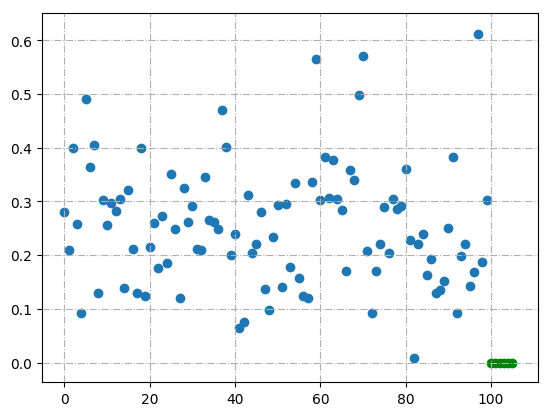

In [9]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cls_id_108_head = np.arange(100)
plt.scatter(cls_id_108_head, sorted_cls_AP108[:100])

cls_id_108_tail = np.arange(100,106)
plt.scatter(cls_id_108_tail, sorted_cls_AP108[100:106], color='g')
# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show()  

## plot the result for head 100 classes

In [10]:
#result for 100 base classes
RESULT_PATH = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckp-fewshot-base100/Validation/lvis_dt.json"
ANNOTATION_PATH = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_v0.5_val_top100.json"
SAVE_PATH = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckp-fewshot-base100/Validation"
sorted_id_json_file = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_sorted_id_test.json"
ANN_TYPE = 'bbox'

with open(sorted_id_json_file, 'r') as f:
    sorted_id = json.load(f)
    
valid_cls_id100, sorted_cls_AP100 =  get_sorted_AP(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH, sorted_id[:100])
  

category : 13 : 0.41024231018715746
category : 34 : 0.18126145868403667
category : 35 : 0.14306392452782254
category : 36 : 0.25589899536341076
category : 45 : 0.3059085303044758
category : 50 : 0.14168763667222378
category : 59 : 0.35624392260270943
category : 61 : 0.181635731876884
category : 81 : 0.42936281810602783
category : 88 : 0.028069306930693063
category : 91 : 0.2560557737448363
category : 95 : 0.27143441614052977
category : 99 : 0.29327452522919056
category : 118 : 0.2015753650339703
category : 124 : 0.12554115851145553
category : 126 : 0.21458032008151448
category : 132 : 0.23027733621718194
category : 133 : 0.24831500696620035
category : 139 : 0.38724016235474945
category : 154 : 0.3626866719483012
category : 179 : 0.21064209887416918
category : 183 : 0.265125814004148
category : 197 : 0.12229696126150524
category : 208 : 0.37001736353488507
category : 211 : 0.34578022708136036
category : 221 : 0.27437579597364853
category : 237 : 0.13025863027655962
category : 282 : 0.24

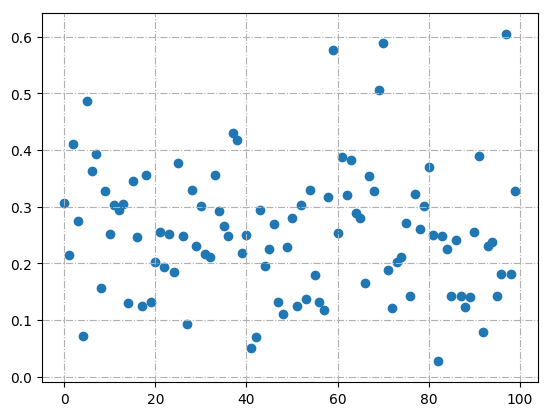

In [13]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cls_id_100_head = np.arange(100)
plt.scatter(cls_id_100_head, sorted_cls_AP100[:100])

# cls_id_108_tail = np.arange(100,106)
# plt.scatter(cls_id_108_tail, sorted_cls_AP[100:106], color='g')
# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show()  


## compare

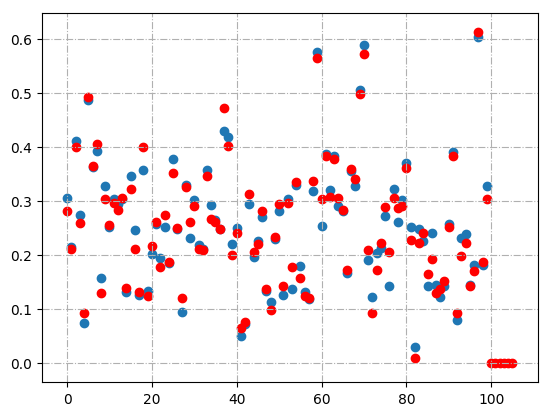

In [14]:
cls_id_100_head = np.arange(100)
plt.scatter(cls_id_100_head, sorted_cls_AP100[:100])


cls_id_108_head = np.arange(100)
plt.scatter(cls_id_108_head, sorted_cls_AP108[:100], color='r')

cls_id_108_tail = np.arange(100,106)
plt.scatter(cls_id_108_tail, sorted_cls_AP108[100:106], color='r')

# cls_id_108_tail = np.arange(100,106)
# plt.scatter(cls_id_108_tail, sorted_cls_AP[100:106], color='g')
# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show()  

In [22]:
import numpy as np
good_cls_ids = np.array(sorted_id)[np.array(sorted_cls_AP)>0.5]
good_cls_names = []
for cls_id in good_cls_ids:
    good_cls_names.extend([lables[str(cls_id)]])

In [23]:
good_cls_names

['zebra',
 'elephant',
 'giraffe',
 'bus_(vehicle)',
 'laptop_computer',
 'tennis_ball',
 'computer_keyboard',
 'frisbee',
 'television_set',
 'lampshade',
 'mouse_(computer_equipment)',
 'ski_parka',
 'fireplug',
 'microwave_oven',
 'bear',
 'soccer_ball',
 'cistern',
 'dishwasher',
 'mousepad',
 'dress_suit',
 'parasail_(sports)',
 'polar_bear',
 'thermostat',
 'icecream',
 'toaster_oven',
 'bib',
 'globe',
 'giant_panda',
 'clothes_hamper',
 'parrot',
 'stapler_(stapling_machine)',
 'telephone_booth',
 'automatic_washer',
 'ostrich',
 'footstool',
 'grizzly',
 'volleyball',
 'eagle',
 'oil_lamp']

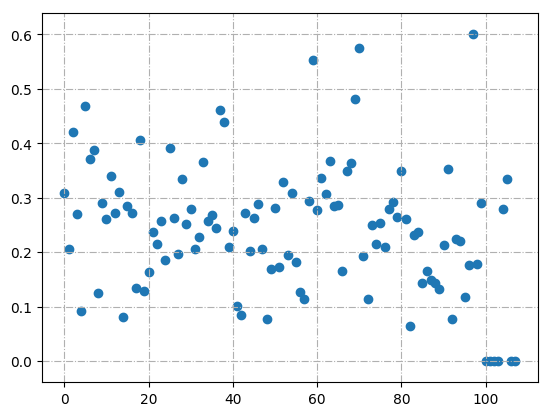

In [43]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
# sorted_cls_AP108 = sorted_cls_AP[:100]+sorted_cls_AP[500:508]
# objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
cls_id = np.arange(108)
# cls_id = valid_cls_id
plt.scatter(cls_id, sorted_cls_AP108)

# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')

plt.show()

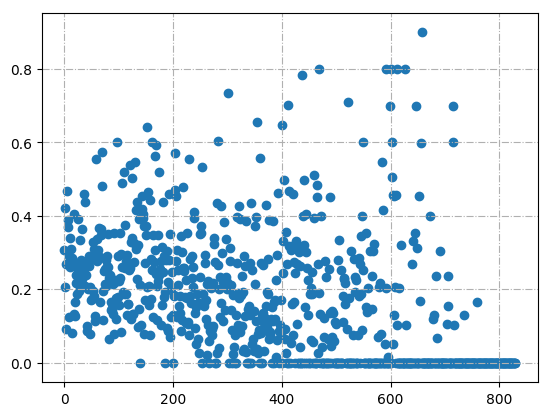

In [19]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
cls_id = np.arange(830)
# cls_id = valid_cls_id
plt.scatter(cls_id, sorted_cls_AP)

# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')

plt.show()

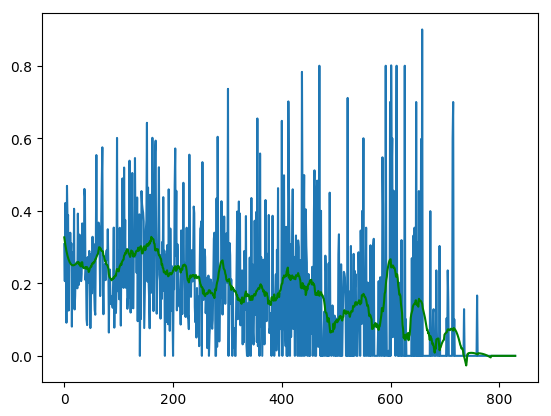

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import savgol_filter

x = np.arange(830)
y = sorted_cls_AP
yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

plt.plot(x,y)
plt.plot(x,yhat, color='g')
plt.show()


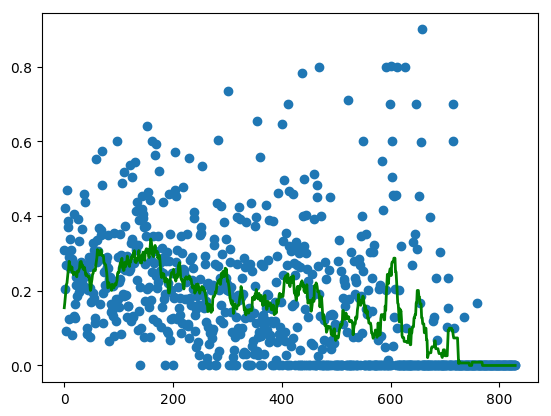

In [23]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

plt.plot(x, y,'o')
# plt.plot(x, smooth(y,3), 'r-', lw=2)
plt.plot(x, smooth(y,19), 'g-', lw=2)

In [ ]:
BBox: 
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=all] = 0.1634
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=300 catIds=all] = 0.2759
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=300 catIds=all] = 0.1727
Average Precision  (AP) @[ IoU=0.50:0.95 | area=     s | maxDets=300 catIds=all] = 0.1325
Average Precision  (AP) @[ IoU=0.50:0.95 | area=     m | maxDets=300 catIds=all] = 0.2257
Average Precision  (AP) @[ IoU=0.50:0.95 | area=     l | maxDets=300 catIds=all] = 0.2726
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=  r] = 0.01
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=  c] = 0.1337
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=  f] = 0.2618

Segm:
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=all] = 0.1623
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=300 catIds=all] = 0.2626
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=300 catIds=all] = 0.1704
Average Precision  (AP) @[ IoU=0.50:0.95 | area=     s | maxDets=300 catIds=all] = 0.1187
Average Precision  (AP) @[ IoU=0.50:0.95 | area=     m | maxDets=300 catIds=all] = 0.2311
Average Precision  (AP) @[ IoU=0.50:0.95 | area=     l | maxDets=300 catIds=all] = 0.2859
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=  r] = 0.012
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=  c] = 0.1423
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=300 catIds=  f] = 0.2472
   

In [22]:
lvis_gt = '/mnt/data-disk0/db_zhangdong/LVIS/lvis_v0.5_val_top100.json'
lvis_gt = LVIS(lvis_gt)

In [24]:
len(lvis_gt.get_cat_ids())

100

In [5]:
lvis_eval.get_results()


OrderedDict([('AP', 0.3676645003471999),
             ('AP50', 0.6261971837787129),
             ('AP75', 0.3842680457694463),
             ('APs', 0.30144006848393434),
             ('APm', 0.4383116520502349),
             ('APl', 0.44698568700634994),
             ('APr', 0.0),
             ('APc', 0.27434664910590434),
             ('APf', 0.3875839974389359),
             ('AR@300', 0.4298204126791178),
             ('ARs@300', 0.3451549077565635),
             ('ARm@300', 0.48783590386221964),
             ('ARl@300', 0.5153266620657926)])

In [6]:
keys = lvis_eval.get_results().keys()

In [ ]:
dts = lvis_dt.load_anns(
    lvis_dt.get_ann_ids(img_ids=[382122], cat_ids=[1024])
)

In [7]:
lvis_eval._gts

defaultdict(list,
            {(6460,
              1057): [{'segmentation': [[286.79,
                 135.59,
                 287.39,
                 141.48,
                 286.64,
                 143.75,
                 285.73,
                 147.83,
                 285.13,
                 156.45,
                 283.92,
                 157.51,
                 283.62,
                 159.93,
                 284.22,
                 161.29,
                 284.37,
                 163.4,
                 283.01,
                 180.64,
                 281.65,
                 194.55,
                 281.65,
                 195.46,
                 279.99,
                 195.91,
                 278.93,
                 196.97,
                 278.67,
                 199.88,
                 280.03,
                 201.69,
                 281.39,
                 203.05,
                 281.09,
                 208.5,
                 280.33,
               

In [9]:
len(lvis_eval.params.cat_ids)

1230

In [15]:
import numpy
numpy.shape(lvis_eval.eval['recall'])

(10, 1230, 4)